## HR-Employee Attrition

In [51]:
# Important Libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# IMPPORTED DATASET:

In [3]:
df=pd.read_csv('hr_employee.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# Shape of dataset :
# 1470 rows and 35 columns

df.shape

(1470, 35)

In [6]:
# TO check Duplicate values

df.duplicated().sum()
df.drop_duplicates(inplace=True)

0

In [7]:
# No Dupoicate values are present in dataset

In [8]:
# Short Information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

### Data Analysis

In [11]:
# No Missing Values

df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
# Data Description:

df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
# TO check correlation between data

df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


### Now We are spliting numeric features and Discrete features

In [28]:
num_features = df.select_dtypes(include=['int64','float64'])
num_features

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [29]:
num_features.shape

(1470, 26)

In [32]:
# For having Discrete features from table: 

dis_features = df.select_dtypes(include=['object'])
dis_features

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [31]:
dis_features.shape

(1470, 9)

In [33]:
# This is our numeric features

num_features.dtypes

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [34]:
# This is our discrete features

dis_features.dtypes

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

In [54]:
single=['StandardHours','EmployeeCount','Over18']
for i in single:
    print(df[i].value_counts())

80    1470
Name: StandardHours, dtype: int64
1    1470
Name: EmployeeCount, dtype: int64
Y    1470
Name: Over18, dtype: int64


In [55]:
df.drop(single,axis=1,inplace=True)
df.drop('EmployeeNumber',axis=1,inplace=True)

In [57]:
 df.dropna(inplace=True)

In [58]:
obj=df.select_dtypes(include=['object'])
for i in obj.columns:
    print(df[i].value_counts())
    print('\n')

No     1233
Yes     237
Name: Attrition, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Male      882
Female    588
Name: Gender, dtype: int64


Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


No     1054
Yes     416
Name: OverTime, dtype: int64




Text(0.5, 1.0, 'Attrition Distribution')

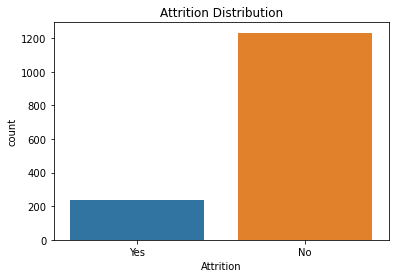

In [59]:
# Imbalanced data

sns.countplot(x='Attrition',data=df)
plt.title('Attrition Distribution')

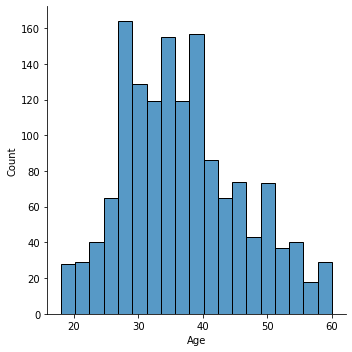

In [60]:
sns.displot(df['Age'])

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

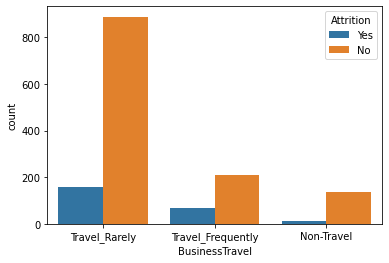

In [61]:
sns.countplot(x='BusinessTravel',hue='Attrition',data=df) 
#Most frequently, Travel Employees leave the company

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

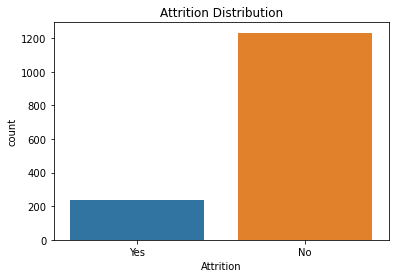

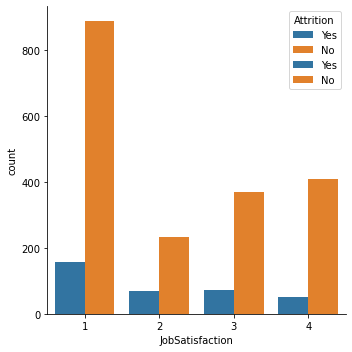

In [62]:
sns.countplot(x='Attrition',data=df)
plt.title('Attrition Distribution')
# Imbalanced data

sns.displot(df['Age'])

sns.countplot(x='BusinessTravel',hue='Attrition',data=df) 
#Most frequently, Travel Employees leave the company

sns.countplot(x='JobSatisfaction',data=df,hue='Attrition')
#It seems like a lot of people are satisfied with their job
#This distribution tells us that more people tend to quit their jobs if they're not happy with them.

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


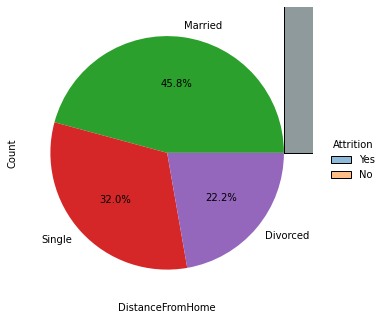

In [63]:
sns.displot(x='DistanceFromHome',hue='Attrition',data=df)

m=df['MaritalStatus'].value_counts()
print(m)
plt.pie(m,labels=['Married', 'Single', 'Divorced'],autopct='%1.1f%%')
plt.show()

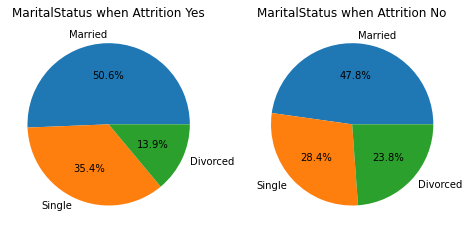

In [64]:
A_yes=df[df['Attrition']=='Yes']
A_no=df[df['Attrition']=='No']
myes=A_yes['MaritalStatus'].value_counts()
mno=A_no['MaritalStatus'].value_counts()
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.pie(myes,labels=['Married', 'Single', 'Divorced'],autopct='%1.1f%%')
plt.title('MaritalStatus when Attrition Yes')
plt.subplot(1, 2, 2)
plt.title('MaritalStatus when Attrition No')
plt.pie(mno,labels=['Married', 'Single', 'Divorced'],autopct='%1.1f%%')
plt.show()

#Single and Married people are more likely to leave the company

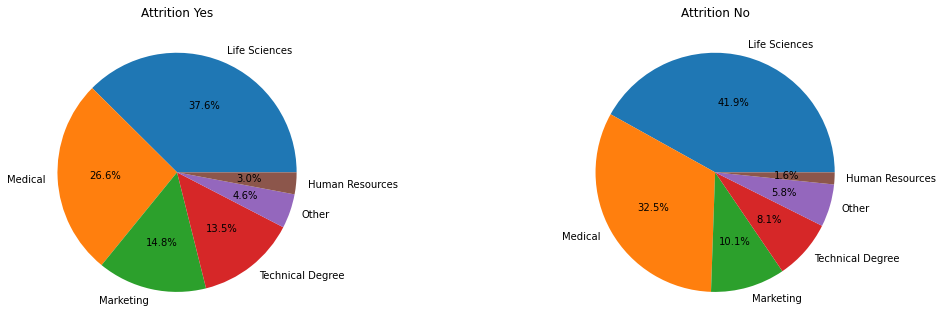

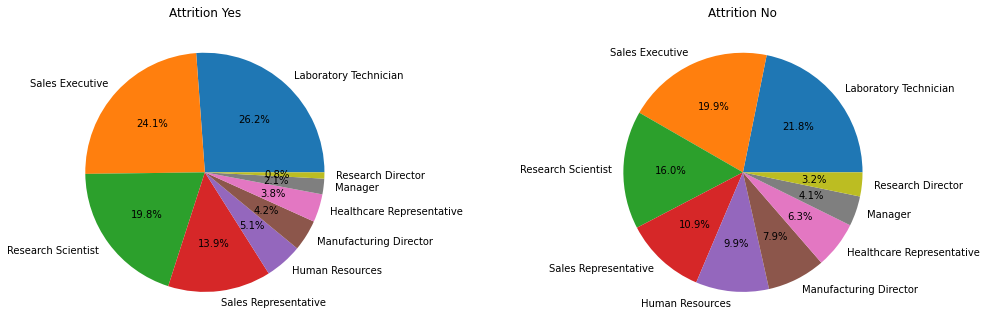

In [65]:
def plotpie(x,xsize,ysize):
    A_yes=df[df['Attrition']=='Yes']
    A_no=df[df['Attrition']=='No']
    myes=A_yes[x].value_counts()
    mno=A_no[x].value_counts()
    plt.figure(figsize=(xsize,ysize))
    plt.subplots_adjust(wspace=0.8, hspace=0.7)
    plt.subplot(1, 2, 1)
    plt.pie(myes,labels=myes.index,autopct='%1.1f%%')
    plt.title('Attrition Yes')
    plt.subplot(1, 2, 2)
    plt.pie(mno,labels=myes.index,autopct='%1.1f%%')
    plt.title('Attrition No')

    plt.show()
    
for i in ['EducationField','JobRole']:
    plotpie(i,15,15)

### Feature Engineering and Scaling

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [74]:
dis_features1=pd.get_dummies(obj,drop_first=True)
dis_features1.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


<AxesSubplot:>

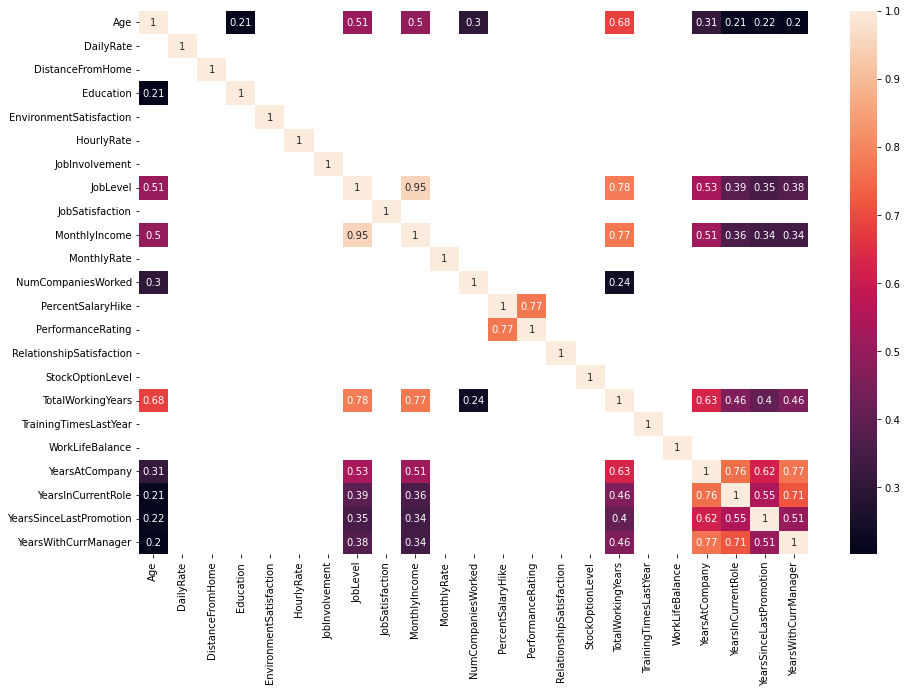

In [75]:
d=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(d[(d>0.2) | (d<-0.2)],annot=True)

In [78]:
mm=MinMaxScaler()
numScale=mm.fit_transform(dis_features1)
df=pd.DataFrame(numScale,columns=dis_features1.columns)
df.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [82]:
final = pd.concat([num_features.reset_index(drop=True),dis_features.reset_index(drop=True)], axis=1)

In [83]:
final.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [84]:
final.shape

(1470, 48)

In [85]:
final.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufactur

### Data Seperation

In [88]:
X=final.drop('Attrition_Yes',axis=1)
y=final['Attrition_Yes']

In [90]:
X.shape

(1470, 47)

In [91]:
y.shape

(1470,)

### Data Scaling

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
mm=MinMaxScaler()
X_mm=mm.fit_transform(X)

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
xtrain,xtest,ytrain,ytest=train_test_split(X_mm,y, test_size=0.2, random_state=1)


In [102]:
print(xtrain.shape)
print(xtest.shape)

(1176, 47)
(294, 47)


### Model Building

In [104]:
# imported Algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [105]:
# Object Created

lg=LogisticRegression()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
sv=SVC()

In [107]:
# For Checking Error rate we have,

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [2]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred= model.predict(xtest)
    
    print('Classification Report : ',classification_report(ytest,ypred))
    print(' ')
    print('Confusion Matrix : ',confusion_matrix(ytest,ypred))
    print(' ')

    print('Training accuracy : ',model.score(xtrain,ytrain))
    
    print('Testing Accuracy : ',model.score(xtest,ytest))
    
    print('Accurac Score : ', accuracy_score(ytest,ypred))
          
    return model

In [109]:
### Logistic Regression

print(mymodel(lg))

classification_report :                precision    recall  f1-score   support

           0       0.85      0.98      0.91       236
           1       0.82      0.31      0.45        58

    accuracy                           0.85       294
   macro avg       0.84      0.65      0.68       294
weighted avg       0.85      0.85      0.82       294

confusion_matrix :  [[232   4]
 [ 40  18]]
Training accuracy :  0.8979591836734694
Testing Accuracy :  0.8503401360544217
accuracy_score :  0.8503401360544217
LogisticRegression()


In [110]:
### SVM

print(mymodel(sv))

classification_report :                precision    recall  f1-score   support

           0       0.83      0.99      0.91       236
           1       0.85      0.19      0.31        58

    accuracy                           0.83       294
   macro avg       0.84      0.59      0.61       294
weighted avg       0.84      0.83      0.79       294

confusion_matrix :  [[234   2]
 [ 47  11]]
Training accuracy :  0.9005102040816326
Testing Accuracy :  0.8333333333333334
accuracy_score :  0.8333333333333334
SVC()


In [111]:
### Decision Tree

print(mymodel(dt))

classification_report :                precision    recall  f1-score   support

           0       0.85      0.88      0.86       236
           1       0.43      0.38      0.40        58

    accuracy                           0.78       294
   macro avg       0.64      0.63      0.63       294
weighted avg       0.77      0.78      0.77       294

confusion_matrix :  [[207  29]
 [ 36  22]]
Training accuracy :  1.0
Testing Accuracy :  0.7789115646258503
accuracy_score :  0.7789115646258503
DecisionTreeClassifier()


In [112]:
### K-NearestNeighbor

print(mymodel(knn))

classification_report :                precision    recall  f1-score   support

           0       0.82      0.96      0.89       236
           1       0.50      0.17      0.26        58

    accuracy                           0.80       294
   macro avg       0.66      0.57      0.57       294
weighted avg       0.76      0.80      0.76       294

confusion_matrix :  [[226  10]
 [ 48  10]]
Training accuracy :  0.8784013605442177
Testing Accuracy :  0.8027210884353742
accuracy_score :  0.8027210884353742
KNeighborsClassifier()


In [113]:
### Random Forest 

print(mymodel(rf))

classification_report :                precision    recall  f1-score   support

           0       0.82      0.99      0.90       236
           1       0.73      0.14      0.23        58

    accuracy                           0.82       294
   macro avg       0.78      0.56      0.56       294
weighted avg       0.80      0.82      0.77       294

confusion_matrix :  [[233   3]
 [ 50   8]]
Training accuracy :  1.0
Testing Accuracy :  0.8197278911564626
accuracy_score :  0.8197278911564626
RandomForestClassifier()


### Conclusion

We have used multiple algorithms for products sales prediction.
Logistic Regression  gives us 85 % accuracy and it is performing well as compare to other algoritms
So we can build model based on random forest.

In [ ]:
https://github.com/MaheshL22/Data-Analytics-project-of-MeriSKILL